<a href="https://colab.research.google.com/github/Hamidkn/PyhtonExampleCodes/blob/main/NoteBook_Learning_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

print("Hello Hamid! This is new Project for Python.")

Hello Hamid! This is new Project for Python.


Here, I started to implement python codes in this notebook.
the goal is to implement an eye tracking system.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])


new codes are here! 
face detection using MTCNN. 


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


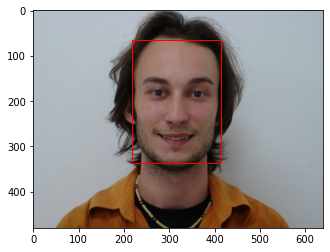

In [ ]:
from matplotlib import pyplot
# for installing new packages which are not in the Colab by default you can use !pip install ....
!pip install mtcnn
from mtcnn.mtcnn import MTCNN
from google.colab import drive
from matplotlib.patches import Rectangle

# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
	# show the plot
	pyplot.show()

# load image from google drive
drive.mount('/content/drive')
img = "/content/drive/My Drive/Colab Notebooks/images/Piggy1.jpg"
pixels = pyplot.imread(img)

# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(img, faces)

{'box': [213, 98, 207, 252], 'confidence': 0.9999927282333374, 'keypoints': {'left_eye': (276, 197), 'right_eye': (371, 195), 'nose': (326, 240), 'mouth_left': (284, 293), 'mouth_right': (366, 292)}}

****************************************************************************************************************************************************************
****************************************************************************************************************************************************************
How to open webcam in the Colab notebook. 

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


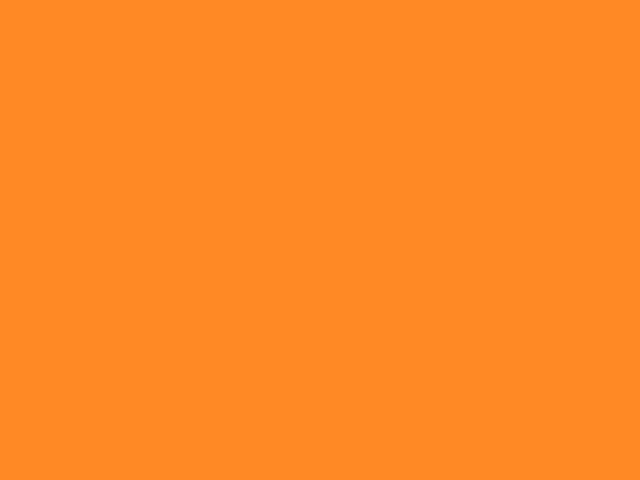

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


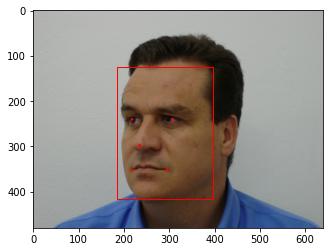

In [ ]:
from matplotlib import pyplot
# for installing new packages which are not in the Colab by default you can use !pip install ....
#!pip install mtcnn
from mtcnn.mtcnn import MTCNN
from google.colab import drive
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
    # draw the dots
		for key, value in result['keypoints'].items():
			# create and draw dot
			dot = Circle(value, radius=2, color='red')
			ax.add_patch(dot)
	# show the plot
	pyplot.show()

# load image from google drive
drive.mount('/content/drive')
img = "/content/drive/My Drive/Colab Notebooks/images/Samouel.jpg"
pixels = pyplot.imread(img)

# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(img, faces)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


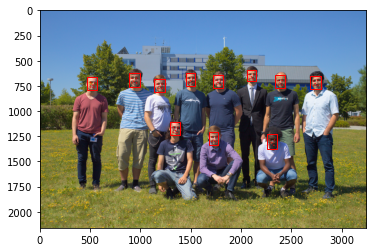

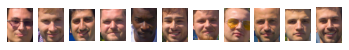

In [ ]:
from matplotlib import pyplot
# for installing new packages which are not in the Colab by default you can use !pip install ....
#!pip install mtcnn
from mtcnn.mtcnn import MTCNN
from google.colab import drive
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
    # draw the dots
		for key, value in result['keypoints'].items():
			# create and draw dot
			dot = Circle(value, radius=2, color='red')
			ax.add_patch(dot)
	# show the plot
	pyplot.show()
 
def draw_faces(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot each face as a subplot
	for i in range(len(result_list)):
		# get coordinates
		x1, y1, width, height = result_list[i]['box']
		x2, y2 = x1 + width, y1 + height
		# define subplot
		pyplot.subplot(1, len(result_list), i+1)
		pyplot.axis('off')
		# plot face
		pyplot.imshow(data[y1:y2, x1:x2])
	# show the plot
	pyplot.show()
 
# load image from google drive
drive.mount('/content/drive')
img = "/content/drive/My Drive/Colab Notebooks/images/1.jpg"
pixels = pyplot.imread(img)

# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(img, faces)
draw_faces(img,faces)

In [ ]:
import numpy as np
from google.colab import drive
from google.colab.patches import cv2_imshow
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

drive.mount('/content/drive')
train_dir = '/content/drive/My Drive/Colab Notebooks/archive/train'
val_dir = '/content/drive/My Drive/Colab Notebooks/archive/test'

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(48,48),batch_size=64,color_mode="grayscale", class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(val_dir,target_size=(48,48),batch_size=64, color_mode="grayscale",class_mode='categorical')

emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))
# emotion_model.load_weights('emotion_model.h5')

cv2.ocl.setUseOpenCL(False)

emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}


emotion_model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=7178 // 64)
emotion_model.load_weights('/content/drive/My Drive/Colab Notebooks/Emojify – Create your own emoji with Deep Learning/emotion_model.h5')
emotion_model.save('/content/drive/My Drive/Colab Notebooks/Emojify – Create your own emoji with Deep Learning/model')

# start the webcam feed

#cap = cv2.VideoCapture(1)
#while True:
    # Find haar cascade to draw bounding box around face
#    ret, frame = cap.read()
#    if not ret:
#        break
#    bounding_box = cv2.CascadeClassifier('/content/drive/My Drive/Colab Notebooks/Emojify – Create your own emoji with Deep Learning/haarcascade_frontalface_default.xml')
#    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#    num_faces = bounding_box.detectMultiScale(gray_frame,scaleFactor=1.3, minNeighbors=5)

#    for (x, y, w, h) in num_faces:
#        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
#        roi_gray_frame = gray_frame[y:y + h, x:x + w]
#        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)
#        emotion_prediction = emotion_model.predict(cropped_img)
#        maxindex = int(np.argmax(emotion_prediction))
#        cv2.putText(frame, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

#    cv2.imshow('Video', cv2.resize(frame,(1200,860),interpolation = cv2.INTER_CUBIC))
#    if cv2.waitKey(1) & 0xFF == ord('q'):
#        break

#cap.release()
#cv2.destroyAllWindows()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
 14/448 [..............................] - ETA: 3:43:48 - loss: 1.9079 - accuracy: 0.1875

KeyboardInterrupt: ignored

In [ ]:
from joblib.numpy_pickle_utils import xrange
from numpy import *


class NeuralNet(object):
    def __init__(self):
        # Generate random numbers
        random.seed(1)

        # Assign random weights to a 3 x 1 matrix,
        self.synaptic_weights = 2 * random.random((3, 1)) - 1

    # The Sigmoid function
    def __sigmoid(self, x):
        return 1 / (1 + exp(-x))

    # The derivative of the Sigmoid function.
    # This is the gradient of the Sigmoid curve.
    def __sigmoid_derivative(self, x):
        return x * (1 - x)

    # Train the neural network and adjust the weights each time.
    def train(self, inputs, outputs, training_iterations):
        for iteration in xrange(training_iterations):
            # Pass the training set through the network.
            output = self.learn(inputs)

            # Calculate the error
            error = outputs - output

            # Adjust the weights by a factor
            factor = dot(inputs.T, error * self.__sigmoid_derivative(output))
            self.synaptic_weights += factor

        # The neural network thinks.

    def learn(self, inputs):
        return self.__sigmoid(dot(inputs, self.synaptic_weights))


if __name__ == "__main__":
    # Initialize
    neural_network = NeuralNet()

    # The training set.
    inputs = array([[0, 1, 1], [1, 0, 0], [1, 0, 1]])
    outputs = array([[1, 0, 1]]).T

    # Train the neural network
    neural_network.train(inputs, outputs, 10000)

    # Test the neural network with a test example.
    print(neural_network.learn(array([1, 0, 1])))

[0.9897704]


Travelling Salesman Problem 

https://www.geeksforgeeks.org/traveling-salesman-problem-tsp-implementation/


In [ ]:
# Python3 program to implement traveling salesman
# problem using naive approach.
from sys import maxsize
from itertools import permutations
V = 4
 
# implementation of traveling Salesman Problem
def travellingSalesmanProblem(graph, s):
 
    # store all vertex apart from source vertex
    vertex = []
    for i in range(V):
        if i != s:
            vertex.append(i)
 
    # store minimum weight Hamiltonian Cycle
    min_path = maxsize
    next_permutation=permutations(vertex)
    for i in next_permutation:
 
        # store current Path weight(cost)
        current_pathweight = 0
 
        # compute current path weight
        k = s
        for j in i:
            current_pathweight += graph[k][j]
            k = j
        current_pathweight += graph[k][s]
 
        # update minimum
        min_path = min(min_path, current_pathweight)
         
    return min_path
 
 
# Driver Code
if __name__ == "__main__":
 
    # matrix representation of graph
    graph = [[0, 10, 15, 20], [10, 0, 35, 25],
            [15, 35, 0, 30], [20, 25, 30, 0]]
    s = 0
    print(travellingSalesmanProblem(graph, s))

80


TSP-using-Genetic-Algorithm
travelling salesman problem using genetic lagorithm


[[7, 24, 21, 5, 13, 15, 17, 9, 1, 14, 19, 12, 11, 18, 0, 16, 2, 23, 20, 10, 4, 3, 8, 6, 22], [23, 2, 14, 16, 8, 7, 15, 18, 17, 5, 6, 22, 9, 19, 12, 20, 13, 11, 21, 3, 4, 1, 24, 0, 10], [24, 21, 1, 20, 13, 9, 22, 12, 5, 3, 23, 17, 6, 7, 16, 2, 19, 8, 10, 11, 15, 4, 0, 18, 14], [12, 17, 18, 15, 19, 11, 4, 8, 14, 0, 7, 24, 9, 16, 21, 20, 1, 13, 6, 23, 5, 3, 10, 2, 22], [0, 1, 9, 10, 15, 24, 22, 12, 3, 5, 4, 14, 17, 19, 23, 8, 11, 18, 20, 13, 21, 16, 6, 2, 7], [11, 6, 1, 20, 17, 12, 14, 2, 16, 10, 13, 5, 7, 21, 18, 15, 0, 4, 3, 8, 24, 23, 9, 19, 22], [13, 23, 7, 15, 16, 14, 19, 2, 10, 21, 4, 0, 6, 9, 24, 12, 5, 18, 8, 17, 22, 20, 3, 11, 1], [18, 2, 17, 21, 16, 7, 0, 10, 19, 5, 1, 15, 22, 8, 14, 11, 23, 13, 3, 24, 20, 9, 6, 4, 12], [4, 0, 13, 5, 1, 9, 19, 18, 20, 24, 10, 2, 14, 8, 12, 21, 17, 3, 15, 23, 22, 16, 6, 7, 11], [23, 24, 5, 2, 10, 16, 20, 14, 4, 7, 22, 15, 9, 12, 11, 8, 1, 21, 17, 6, 13, 0, 19, 18, 3], [0, 22, 5, 18, 8, 12, 9, 24, 2, 23, 14, 7, 4, 11, 16, 20, 10, 15, 3, 17, 6, 21,

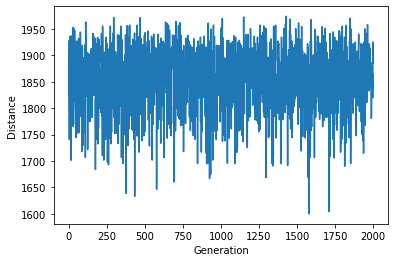

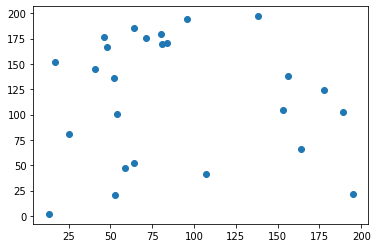

In [ ]:
import numpy as np, random, operator, pandas as pd
import matplotlib.pyplot as plt

def create_starting_population(size,Number_of_city):
    '''Method create starting population 
    size= No. of the city
    Number_of_city= Total No. of the city
    '''
    population = []
    
    for i in range(0,size):
        population.append(create_new_member(Number_of_city))
    
    print(population)
    return population

def pick_mate(N):
    '''mates are randomaly picked 
    N= no. of city '''
    i=random.randint(0,N)    
    return i

def distance(i,j):
    '''
    Method calculate distance between two cities if coordinates are passed
    i=(x,y) coordinates of first city
    j=(x,y) coordinates of second city
    '''
    #returning distance of city i and j 
    return np.sqrt((i[0]-j[0])**2 + (i[1]-j[1])**2)


def score_population(population, CityList):  
    '''
    Score of the whole population is calculated here
    population= 2 dimensional array conating all the routes
    Citylist= List of the city 
    '''
    scores = []
  
    for i in population:
        #print(i)
        scores.append(fitness(i, CityList))
        #print([fitness(i, the_map)])
    return scores

def fitness(route,CityList):
    '''Individual fitness of the routes is calculated here
    route= 1d array
    CityList = List of the cities
    '''
    #Calculate the fitness and return it.
    score=0
    #N_=len(route)
    for i in range(1,len(route)):
        k=int(route[i-1])
        l=int(route[i])

        score = score + distance(CityList[k],CityList[l])
        np
        
    return score


def create_new_member(Number_of_city):
    '''
    creating new member of the population
    '''
    pop=set(np.arange(Number_of_city,dtype=int))
    route=list(random.sample(pop,Number_of_city))
            
    return route

def crossover(a,b):
    '''
    cross over 
    a=route1
    b=route2
    return child
    '''
    child=[]
    childA=[]
    childB=[]
    
    
    geneA=int(random.random()* len(a))
    geneB=int(random.random()* len(a))
    
    start_gene=min(geneA,geneB)
    end_gene=max(geneA,geneB)
    
    for i in range(start_gene,end_gene):
        childA.append(a[i])
        
    childB=[item for item in a if item not in childA]
    child=childA+childB
             
    return child

def mutate(route,probablity):
    '''
    mutation 
    route= 1d array
    probablity= mutation probablity
    '''
    #for mutating shuffling of the nodes is used
    route=np.array(route)
    for swaping_p in range(len(route)):
        if(random.random() < probablity):
            swapedWith = np.random.randint(0,len(route))
            
            temp1=route[swaping_p]
            
            temp2=route[swapedWith]
            route[swapedWith]=temp1
            route[swaping_p]=temp2
    
    return route

def selection(popRanked, eliteSize):
    selectionResults=[]
    result=[]
    for i in popRanked:
        result.append(i[0])
    for i in range(0,eliteSize):
        selectionResults.append(result[i])
    
    return selectionResults


def rankRoutes(population,City_List):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = fitness(population[i],City_List)
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = False)

def breedPopulation(mating_pool):
    children=[]
    for i in range(len(mating_pool)-1):
            children.append(crossover(mating_pool[i],mating_pool[i+1]))
    return children

def mutatePopulation(children,mutation_rate):
    new_generation=[]
    for i in children:
        muated_child=mutate(i,mutation_rate)
        new_generation.append(muated_child)
    return new_generation

def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

def next_generation(City_List,current_population,mutation_rate,elite_size):
    population_rank=rankRoutes(current_population,City_List)
    
    #print(f"population rank : {population_rank}")
    
    selection_result=selection(population_rank,elite_size)
    #print(f"selection results {selection_result}")
    
    mating_pool=matingPool(current_population,selection_result)
    #print(f"mating pool {mating_pool}")
    
    children=breedPopulation(mating_pool)
    #print(f"childern {children}")
    
    next_generation=mutatePopulation(children,mutation_rate)
    #print(f"next_generation {next_generation}")
    return next_generation

def genetic_algorithm(City_List,size_population=1000,elite_size=75,mutation_Rate=0.01,generation=2000):
    '''size_population = 1000(default) Size of population
        elite_size = 75 (default) No. of best route to choose
        mutation_Rate = 0.05 (default) probablity of Mutation rate [0,1]
        generation = 2000 (default) No. of generation  
    '''
    pop=[]
    progress = []
    
    Number_of_cities=len(City_List)
    
    population=create_starting_population(size_population,Number_of_cities)
    progress.append(rankRoutes(population,City_List)[0][1])
    print(f"initial route distance {progress[0]}")
    print(f"initial route {population[0]}")
    for i in range(0,generation):
        pop = next_generation(City_List,population,mutation_Rate,elite_size)
        progress.append(rankRoutes(pop,City_List)[0][1])
    
    
    rank_=rankRoutes(pop,City_List)[0]
    
    print(f"Best Route :{pop[rank_[0]]} ")
    print(f"best route distance {rank_[1]}")
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()
    
    return rank_, pop


cityList = []


for i in range(0,25):
    x=int(random.random() * 200)
    y=int(random.random() * 200)
    cityList.append((x,y))

rank_,pop=genetic_algorithm(City_List=cityList)

#x_axis=[]
#y_axis=[]
#for i in cityList:
#    x_axis.append(i[0])
#    y_axis.append(i[1])

#plt.scatter(x_axis,y_axis)
#plt.show()

In [ ]:
Sinusoidal Forcing Of A Spring-Mass-Damper System

       position  position_acc      velocity  forcing_function
time                                                         
0.00   0.000000      1.000000  1.011744e-17          1.000000
0.01   0.000050      0.993033  9.976767e-03          0.998027
0.02   0.000199      0.972208  1.981444e-02          0.992115
0.03   0.000445      0.937756  2.937548e-02          0.982287
0.04   0.000785      0.890062  3.852541e-02          0.968583
...         ...           ...           ...               ...
19.96  0.014209     -0.452284 -1.384338e-01          0.968583
19.97  0.012804     -0.298142 -1.421859e-01          0.982287
19.98  0.011370     -0.144894 -1.443997e-01          0.992115
19.99  0.009921      0.005889 -1.450920e-01          0.998027
20.00  0.008473      0.152679 -1.442952e-01          1.000000

[2001 rows x 4 columns]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9edfedf0d0>,
      dtype=object)

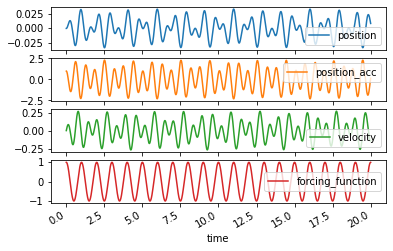

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#!pip install resonance
from resonance.linear_systems import MassSpringDamperSystem

sys = MassSpringDamperSystem()
#print(sys)
sys.constants
#sys.plot_configuration()
trajectory = sys.sinusoidal_forcing_response(1, 2 * np.pi, 20)
print(trajectory)

trajectory.plot(subplots = True)

Spring Damper

t = [0.000e+00 1.000e-03 2.000e-03 ... 1.997e+00 1.998e+00 1.999e+00]


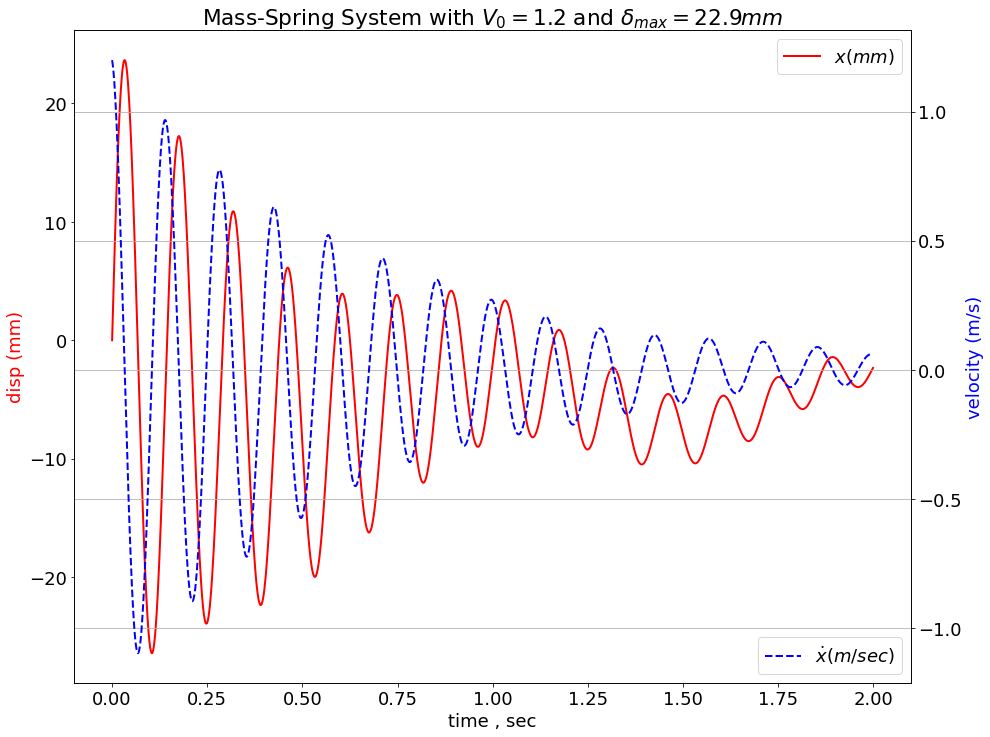

In [ ]:
import matplotlib.pylab as pylab

# forces plots to appear in the ipython notebook
%matplotlib inline

from scipy.integrate import odeint
from pylab import plot,xlabel,ylabel,title,legend,figure,subplots

from pylab import cos, pi, arange, sqrt, pi, array, array

def MassSpringDamper(state,t):
    '''
    k=spring constant, Newtons per metre
    m=mass, Kilograms
    c=dampign coefficient, Newton*second / meter    
    
    for a mass,spring
        xdd = ((-k*x)/m) + g
    for a mass, spring, damper 
        xdd = -k*x/m -c*xd-g
    for a mass, spring, dmaper with forcing function
        xdd = -k*x/m -c*xd-g + cos(4*t-pi/4)
    '''
  
    k=124e3  # spring constant, kN/m
    m=64 # mass, Kg
    c=3  # damping coefficient 
    # unpack the state vector
    x,xd = state # displacement,x and velocity x'
    g = 9.8 # metres per second**2
    # compute acceleration xdd = x''
    omega = 1.0 # frequency
    phi = 0.0 # phase shift
    A = 5.0 # amplitude
    xdd = -k*x/m -c*xd-g + A*cos(2*pi*omega*t - phi)
    return [xd, xdd]

state0 = [0.0, 1.2]  #initial conditions [x0 , v0]  [m, m/sec] 
ti = 0.0  # initial time
tf = 2.0  # final time
step = 0.001  # step
t = arange(ti, tf, step)
print(f't = {t}')
state = odeint(MassSpringDamper, state0, t)
x = array(state[:,[0]])
xd = array(state[:,[1]])

# Plotting displacement and velocity
pylab.rcParams['figure.figsize'] = (15, 12)
pylab.rcParams['font.size'] = 18

fig, ax1 = pylab.subplots()
ax2 = ax1.twinx()
ax1.plot(t,x*1e3,'r',label = r'$x (mm)$', linewidth=2.0)
ax2.plot(t,xd,'b--',label = r'$\dot{x} (m/sec)$', linewidth=2.0)
ax2.legend(loc='lower right')
ax1.legend()
ax1.set_xlabel('time , sec')
ax1.set_ylabel('disp (mm)',color='r')
ax2.set_ylabel('velocity (m/s)',color='b')
pylab.title('Mass-Spring System with $V_0=1.2 \frac{m}{s}$ and $\delta_{max}=22.9mm$')
pylab.grid()

In [ ]:
import numpy as np


t = np.array(np.arange(0,2,0.01))
print(t)

i = np.array(np.arange(1,4,1))
print(i)
print(len(i))

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11
 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25
 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39
 1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53
 1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67
 1.68 1.69 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81
 1.82 1.83 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.92 1.93 1.94 1.95
 1.96 

VARMAX models 

This is a brief introduction notebook to VARMAX models in statsmodels. The VARMAX model is generically specified as:
https://www.statsmodels.org/stable/examples/notebooks/generated/statespace_varmax.html




In [ ]:
# matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas.util.testing as tm

dta = sm.datasets.webuse('lutkepohl2', 'https://www.stata-press.com/data/r12/')

dta.index = dta.qtr
dta.index.freq = dta.index.inferred_freq

endog = dta.loc['1960-04-01':'1978-10-01', ['dln_inv', 'dln_inc', 'dln_consump']]
print(endog)

exog = endog['dln_consump']
mod = sm.tsa.VARMAX(endog[['dln_inv', 'dln_inc']], order=(2,0), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

             dln_inv   dln_inc  dln_consump
qtr                                        
1960-04-01 -0.005571  0.030570     0.014355
1960-07-01  0.032970  0.042111     0.030411
1960-10-01  0.037139  0.016360     0.031749
1961-01-01  0.094363  0.031939     0.024257
1961-04-01 -0.043591  0.021381    -0.002181
...              ...       ...          ...
1977-10-01  0.026188  0.021032     0.017272
1978-01-01  0.025520  0.010843     0.012479
1978-04-01  0.035580  0.014599     0.018431
1978-07-01  0.025508  0.024339     0.013194
1978-10-01  0.036367  0.005173     0.005990

[75 rows x 3 columns]
                             Statespace Model Results                             
Dep. Variable:     ['dln_inv', 'dln_inc']   No. Observations:                   75
Model:                            VARX(2)   Log Likelihood                 361.039
Date:                    Wed, 02 Jun 2021   AIC                           -696.078
Time:                            11:01:51   BIC                          

http://www.chadfulton.com/fulton_statsmodels_2017/sections/2-state_space_models.html#kalman-filter


**Kalman Filter**

In [ ]:
from pandas_datareader.data import DataReader
from pylab import show, plot
import statsmodels.api as sm
import pandas as pd
# from pandas.io.data import DataReader

cpi = DataReader('CPIAUCNS', 'fred', start='1971-01', end= '2021-02')
cpi.index = pd.DatetimeIndex(cpi.index, freq='MS')
inf = np.log(cpi).resample('QS').mean().diff()[1:]*400
# plot(inf)
# show()

nile = sm.datasets.nile.load_pandas().data['volume']
nile.index = pd.date_range('1871', '1970', freq='AS')

# plot(nile)
# show()

start='1984-01'
end = '2014-01'
labor = DataReader('HOANBS', 'fred', start=start, end=end)  # hours
cons = DataReader('PCECC96', 'fred', start=start, end=end)  # billions of dollars
inv = DataReader('GPDIC1', 'fred', start=start, end=end)    # billions of dollars
pop = DataReader('CNP16OV', 'fred', start=start, end=end)   # thousands of persons
pop = pop.resample('QS')  # Convert pop from monthly to quarterly observations

# Per-capita terms
# N = cons['PCECC96'] * 6e4 / pop['CNP16OV']
C = (cons['PCECC96'] * 1e6 / pop['CNP16OV']) / 4
I = (inv['GPDIC1'] * 1e6 / pop['CNP16OV']) / 4
Y = C + I

# Log, detrend
y = np.log(Y).diff()[1:]
c = np.log(C).diff()[1:]
# n = np.log(N).diff()[1:]
rbc_data = pd.concat((y, c), axis=1)

# ;kdjklkjrn= l()
# print(klsjlid'l;ksdjiplothamin' )
# show()


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sat May 24 14:42:55 2014

@author: rlabbe
"""
#!pip install filterpy
from filterpy import kalman
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as random

f = Kalman(dim=4)

dt = 1
f.F = np.mat ([[1, dt, 0,  0],
               [0,  1, 0,  0],
               [0,  0, 1, dt],
               [0,  0, 0,  1]])

f.H = np.mat ([[1, 0, 0, 0],
               [0, 0, 1, 0]])



f.Q *= 4.
f.R = np.mat([[50,0],
              [0, 50]])

f.x = np.mat([0,0,0,0]).T
f.P *= 100.


xs = []
ys = []
count = 200
for i in range(count):
    z = np.mat([[i+random.randn()*1],[i+random.randn()*1]])
    f.predict ()
    f.update (z)
    xs.append (f.x[0,0])
    ys.append (f.x[2,0])


plt.plot (xs, ys)
plt.show()


NameError: ignored

In [ ]:
a=7
b=8
c=10
average = round((a+b)/c)
print(average)

cc = round(average)
print(cc)

2
2


In [ ]:
import numpy as np

a = np.array([[1,2], [3,4]])
print(a)

# Flatten() Return a copy of the array collapsed into one dimension.
b = a.flatten()
print(b)

t1 = np.array([0, 0.001])
print(t1)

[[1 2]
 [3 4]]
[1 2 3 4]
[0.    0.001]


In [ ]:
import numpy as np
num_data = 40003
act1 = 2000 * (np.random.rand(num_data) - 0.5)
print(act1[0])

for roll in range(1):
  y = np.sin(act1[0])
  print(f'y: {y}')

559.7657304444627
y: 0.5330811122582112


In [ ]:
a = 1
b = a/4
print(b)

0.25


How to generate Integer Values for create a population for GA,...

In [ ]:
from numpy.random import randint
import numpy as np

n_pop = 100
n_bits = 20
# initial population of random bitstring
pop = [randint(1, 5, n_bits).tolist() for _ in range(n_pop)]
print(np.shape(pop))
print(pop)


(100, 20)
[[4, 4, 2, 4, 4, 2, 2, 1, 4, 4, 3, 2, 2, 4, 3, 3, 1, 3, 4, 4], [1, 4, 1, 3, 3, 1, 2, 4, 3, 2, 4, 1, 2, 3, 3, 1, 2, 2, 1, 3], [2, 4, 2, 3, 2, 2, 1, 2, 2, 4, 2, 3, 3, 1, 3, 4, 4, 4, 2, 3], [3, 4, 1, 2, 2, 4, 3, 3, 3, 1, 1, 3, 3, 4, 1, 2, 3, 2, 1, 3], [3, 3, 1, 3, 1, 3, 3, 4, 4, 4, 1, 3, 4, 4, 1, 3, 2, 2, 1, 3], [2, 2, 3, 4, 4, 2, 3, 4, 3, 1, 1, 4, 4, 3, 3, 4, 3, 2, 4, 2], [2, 1, 4, 2, 1, 1, 3, 3, 4, 1, 3, 2, 4, 4, 2, 1, 4, 3, 4, 1], [1, 4, 1, 3, 3, 1, 2, 1, 2, 3, 2, 3, 3, 3, 2, 2, 2, 3, 1, 1], [3, 2, 3, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 4, 1, 4, 1, 4, 1, 3], [2, 2, 3, 2, 3, 2, 2, 1, 1, 3, 1, 2, 3, 1, 4, 1, 3, 4, 4, 4], [4, 2, 3, 3, 2, 3, 4, 3, 1, 4, 3, 2, 2, 2, 1, 4, 2, 3, 2, 3], [2, 3, 2, 1, 1, 4, 4, 2, 2, 4, 2, 3, 3, 4, 3, 2, 3, 2, 3, 2], [2, 2, 3, 2, 1, 1, 3, 3, 4, 2, 2, 3, 3, 2, 2, 3, 3, 1, 2, 1], [3, 3, 2, 3, 4, 1, 1, 3, 4, 3, 2, 1, 3, 1, 3, 3, 2, 4, 4, 1], [2, 4, 1, 1, 2, 3, 2, 2, 2, 1, 3, 4, 4, 2, 4, 2, 2, 2, 3, 3], [4, 4, 3, 4, 3, 4, 1, 4, 2, 1, 1, 2, 1, 3, 2, 2, 1, 4, 4, 2

In [ ]:
import numpy as np

x = np.random.random()
print(x)

np.rint(x).astype(int)
print(x)

0.07709401667557159
0.07709401667557159


[[-0.21256481 -0.03236879]
 [ 0.29346969 -1.54487033]
 [-0.83691644  0.12654705]
 ...
 [ 0.98441595  1.48997805]
 [ 2.18023338  2.01470658]
 [-0.21649075  1.4876433 ]]


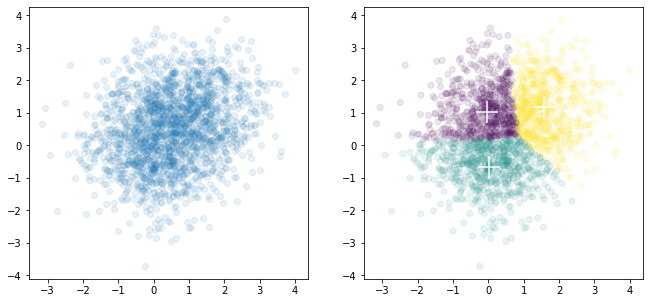

In [ ]:

# !pip install fuzzy-c-means


import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt

n_samples = 1000

X = np.concatenate((
    np.random.normal((0, 0), size=(n_samples, 2)),
    np.random.normal((1, 1), size=(n_samples, 2))
))

print(X)

fcm = FCM(n_clusters=3)
fcm.fit(X)


# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X)

# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X[:,0], X[:,1], alpha=.1)
axes[1].scatter(X[:,0], X[:,1], c=fcm_labels, alpha=.1)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='w')
plt.show()

In [ ]:
import numpy as np
d =[1,2,3,0,0,9,0,0,0,0,0,0,0,0,11,2,0,38,7,8,9,6,5,4,1,2,3,0,0,0,0,0,]
#print(d)

#d = filter(None,d)
d = [x for x in d if x]
print(d)

test_list = [4, 5, 6, 3, 9]
d.append(test_list)

print(np.shape(d))
#d.insert(len(d),test_list)
#print(d)


[1, 2, 3, 9, 11, 2, 38, 7, 8, 9, 6, 5, 4, 1, 2, 3]
(17,)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


AttributeError: ignored

Following example shows the performance of argrelextrema,
In the plot you can see the local maximums are in 3, and 6, 8, and 10.

[2 1 2 3 2 0 1 0 4 1 2 0]


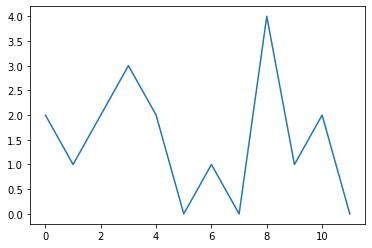

(array([ 3,  6,  8, 10]),)

In [ ]:
from scipy.signal import argrelextrema
import numpy as np
import matplotlib.pyplot as plt


x = np.array([2, 1, 2, 3, 2, 0, 1, 0, 4, 1, 2, 0])
print(x)
plt.plot(x)
plt.show()

argrelextrema(x, np.greater)



# DYNAMIC QUANTIZATION
https://pytorch.org/tutorials/recipes/recipes/dynamic_quantization.html 



In [ ]:
# import the modules used here in this recipe
import torch
import torch.quantization
import torch.nn as nn
import copy
import os
import time

# define a very, very simple LSTM for demonstration purposes
# in this case, we are wrapping nn.LSTM, one layer, no pre or post processing
# inspired by
# https://pytorch.org/tutorials/beginner/nlp/sequence_models_tutorial.html, by Robert Guthrie
# and https://pytorch.org/tutorials/advanced/dynamic_quantization_tutorial.html
class lstm_for_demonstration(nn.Module):
  """Elementary Long Short Term Memory style model which simply wraps nn.LSTM
     Not to be used for anything other than demonstration.
  """
  def __init__(self,in_dim,out_dim,depth):
     super(lstm_for_demonstration,self).__init__()
     self.lstm = nn.LSTM(in_dim,out_dim,depth)

  def forward(self,inputs,hidden):
     out,hidden = self.lstm(inputs,hidden)
     return out, hidden


torch.manual_seed(29592)  # set the seed for reproducibility

#shape parameters
model_dimension=8
sequence_length=20
batch_size=1
lstm_depth=1

# random data for input
inputs = torch.randn(sequence_length,batch_size,model_dimension)
print(f"inputs: {inputs}")
# hidden is actually is a tuple of the initial hidden state and the initial cell state
hidden = (torch.randn(lstm_depth,batch_size,model_dimension), torch.randn(lstm_depth,batch_size,model_dimension))
print(f"hidden: {hidden}")

inputs: tensor([[[ 6.9405e-01,  5.5059e-01,  1.5328e+00,  3.0617e-01,  5.0044e-01,
           1.3226e-01,  5.4763e-01, -9.5412e-01]],

        [[ 1.3855e+00, -5.8340e-01, -4.2053e-01, -1.9759e+00, -2.0270e-01,
           8.6455e-01,  1.0373e+00, -1.0476e+00]],

        [[-1.6531e+00, -2.5510e-01, -1.5866e+00,  6.9649e-01, -8.3117e-01,
          -1.3309e-01, -2.1873e-01, -5.3897e-01]],

        [[ 1.3616e+00, -8.8398e-01,  9.9410e-01, -1.0163e+00, -3.1092e-01,
           3.4422e-01,  1.6379e+00, -1.1483e+00]],

        [[ 5.8698e-01,  4.4289e-01, -1.5498e-01, -1.0263e+00,  8.2939e-01,
           1.1699e+00, -1.2129e+00, -7.7898e-01]],

        [[-5.3246e-01, -2.6406e+00,  8.5169e-01,  5.6374e-02, -4.3999e-01,
          -4.0320e-01,  1.2183e+00,  1.3993e+00]],

        [[-4.5023e-01, -1.0066e-01,  1.3164e+00, -1.3124e+00,  7.3155e-01,
          -1.4874e-01,  1.7631e+00,  8.2075e-01]],

        [[-3.2912e-01, -2.0291e+00, -8.2603e-01,  7.2959e-01, -5.1713e-01,
           8.2403e-01,  6.67

In [ ]:
 # here is our floating point instance
float_lstm = lstm_for_demonstration(model_dimension, model_dimension,lstm_depth)

# this is the call that does the work
quantized_lstm = torch.quantization.quantize_dynamic(
    float_lstm, {nn.LSTM, nn.Linear}, dtype=torch.qint8
)

# show the changes that were made
print('Here is the floating point version of this module:')
print(float_lstm)
print('')
print('and now the quantized version:')
print(quantized_lstm)

Here is the floating point version of this module:
lstm_for_demonstration(
  (lstm): LSTM(8, 8)
)

and now the quantized version:
lstm_for_demonstration(
  (lstm): DynamicQuantizedLSTM(8, 8)
)


In [ ]:
def print_size_of_model(model, label=""):
    torch.save(model.state_dict(), "temp.p")
    size=os.path.getsize("temp.p")
    print("model: ",label,' \t','Size (KB):', size/1e3)
    os.remove('temp.p')
    return size

# compare the sizes
f=print_size_of_model(float_lstm,"fp32")
q=print_size_of_model(quantized_lstm,"int8")
print("{0:.2f} times smaller".format(f/q))

model:  fp32  	 Size (KB): 3.743
model:  int8  	 Size (KB): 2.655
1.41 times smaller


In [ ]:
import numpy as np
from keras import backend as K

x = np.linspace(1,10)
print(x)

K.clip(x, 1, 5)

[ 1.          1.18367347  1.36734694  1.55102041  1.73469388  1.91836735
  2.10204082  2.28571429  2.46938776  2.65306122  2.83673469  3.02040816
  3.20408163  3.3877551   3.57142857  3.75510204  3.93877551  4.12244898
  4.30612245  4.48979592  4.67346939  4.85714286  5.04081633  5.2244898
  5.40816327  5.59183673  5.7755102   5.95918367  6.14285714  6.32653061
  6.51020408  6.69387755  6.87755102  7.06122449  7.24489796  7.42857143
  7.6122449   7.79591837  7.97959184  8.16326531  8.34693878  8.53061224
  8.71428571  8.89795918  9.08163265  9.26530612  9.44897959  9.63265306
  9.81632653 10.        ]


<tf.Tensor: shape=(50,), dtype=float64, numpy=
array([1.        , 1.18367347, 1.36734694, 1.55102041, 1.73469388,
       1.91836735, 2.10204082, 2.28571429, 2.46938776, 2.65306122,
       2.83673469, 3.02040816, 3.20408163, 3.3877551 , 3.57142857,
       3.75510204, 3.93877551, 4.12244898, 4.30612245, 4.48979592,
       4.67346939, 4.85714286, 5.        , 5.        , 5.        ,
       5.        , 5.        , 5.        , 5.        , 5.        ,
       5.        , 5.        , 5.        , 5.        , 5.        ,
       5.        , 5.        , 5.        , 5.        , 5.        ,
       5.        , 5.        , 5.        , 5.        , 5.        ,
       5.        , 5.        , 5.        , 5.        , 5.        ])>

In [ ]:
indices, values, dense_shape = [], [], [2 * 3 * 1, 2 * 2 * 1]

print(indices)
print(values)
print(dense_shape)

import numpy as np
matrix = np.zeros((2 * 3 * 1, 2 * 2 * 1), dtype=np.float32)
print(matrix)

[]
[]
[6, 4]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
# import tensorflow as tf
#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior() 
import tensorflow._api.v2.compat as tv

x_PH = tv.v1.placeholder(tf.float32, [None, 28, 28, 1])
x_PH
print(f'x_PH: {x_PH}')

x_PH: Tensor("Placeholder_5:0", shape=(?, 28, 28, 1), dtype=float32)


In [ ]:
! pip install -q tensorflow-model-optimization
import numpy as np
import tensorflow as tf
import tensorflow 
import time
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import re

from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow_model_optimization.sparsity import keras as sparsity

#Load dataset as train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(y_test)
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
num_classes = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


from keras.models import Sequential
from keras import models, layers
from keras import regularizers
model = keras.Sequential()
model.add(keras.layers.Dropout(0.2,input_shape=(784,)))
model.add(keras.layers.Dense(1000,
                        kernel_regularizer = regularizers.l2(0.01),
                        activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1000,
                        kernel_regularizer = regularizers.l2(0.01),
                        activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10,  activation='softmax'))
#display the model summary
model.summary()


model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer='adam', 
              metrics=['accuracy'])

hist = model.fit(x_train, y_train,
                        batch_size=128,
                        epochs=10,
                        verbose=1,
                        validation_data=(x_test,y_test))


[7 2 1 ... 4 5 6]
60000 train samples
10000 test samples
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_3 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_4 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainab

In [7]:
import numpy as np
from sklearn.preprocessing import normalize

x = np.random.rand(1000)*10
#print(x)
norm1 = x / np.linalg.norm(x)
#print(norm1)
norm2 = normalize(x[:,np.newaxis], axis=0).ravel()
#print(norm2)
print(np.all(norm1 == norm2))
# True


an_array = np.array([0.0001,0.0002,0.0003,0.0004,0.0005])

norm = np.linalg.norm(an_array)
normal_array = an_array/norm
print(normal_array)

False
[0.13483997 0.26967994 0.40451992 0.53935989 0.67419986]
